<a href="https://colab.research.google.com/github/RahulDhinakaran/Data_Science_Projects/blob/main/Random_Forests_for_Fraud_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**

In [1]:
from google.colab import files
upload=files.upload()

Saving Fraud_check (1).csv to Fraud_check (1).csv


In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("Fraud_check (1).csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
list(df)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [4]:
df["Taxable.Income"]=["Good" if value > 30000
                      else "Risky" for value in df['Taxable.Income']]

In [5]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

Columns_to_encoder=["Undergrad","Marital.Status","Urban","Taxable.Income"]
for columns in Columns_to_encoder:
 df[columns]=LE.fit_transform(df[columns])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [6]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
X=df[["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]]
Y=df["Taxable.Income"]

In [ ]:
df.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,0.012523,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,0.006081,-0.001564,-0.002213,0.064562
Taxable.Income,0.012523,0.006081,1.000000,0.012225,-0.001972,0.004830
City.Population,0.079579,-0.001564,0.012225,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001972,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.004830,-0.040098,-0.094559,1.000000


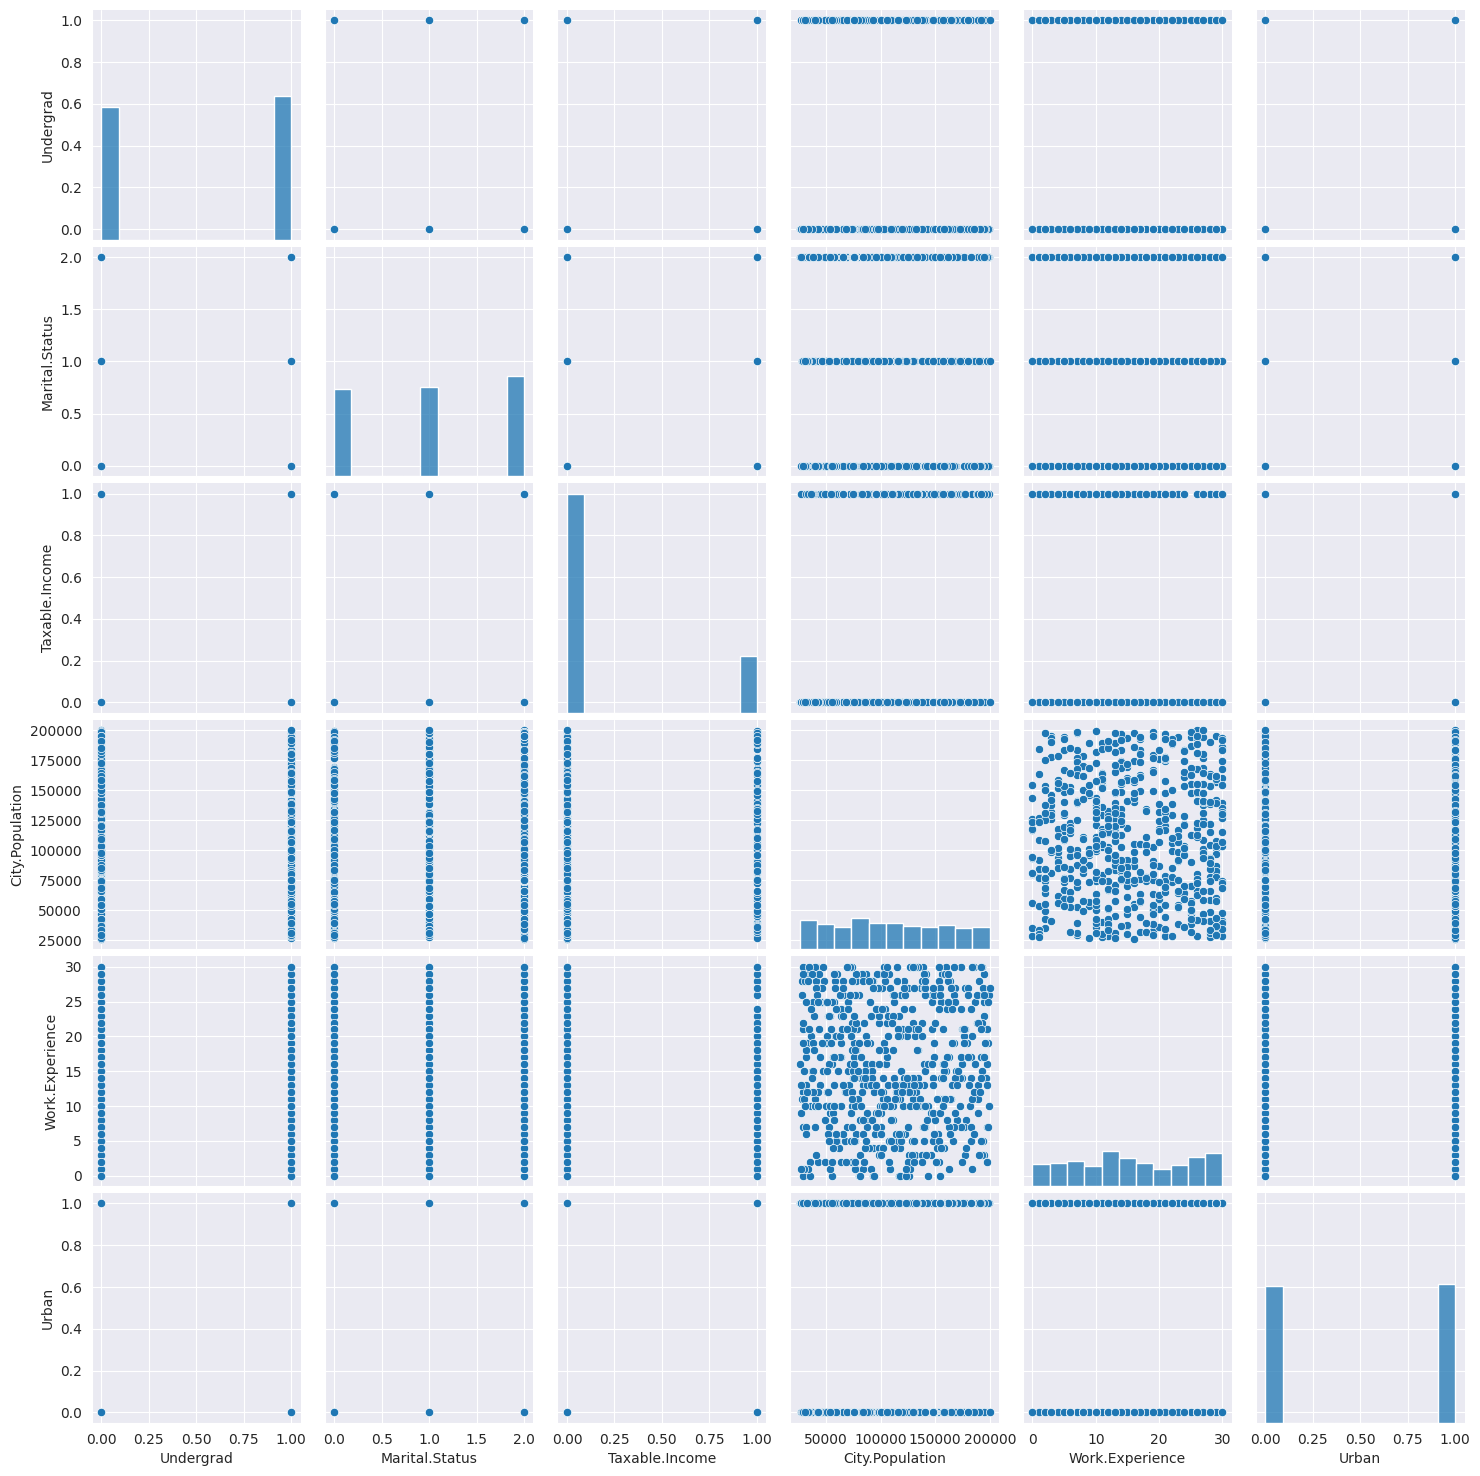

In [8]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df)

array([[<Axes: title={'center': 'Undergrad'}>,
        <Axes: title={'center': 'Marital.Status'}>],
       [<Axes: title={'center': 'Taxable.Income'}>,
        <Axes: title={'center': 'City.Population'}>],
       [<Axes: title={'center': 'Work.Experience'}>,
        <Axes: title={'center': 'Urban'}>]], dtype=object)

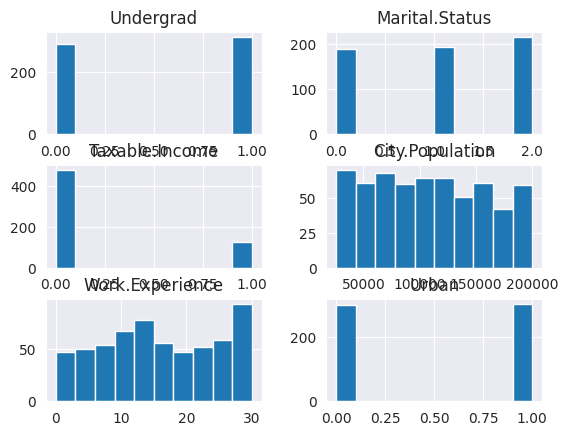

In [9]:
df.hist()

In [10]:
df.skew()

Undergrad         -0.080265
Marital.Status    -0.086622
Taxable.Income     1.452500
City.Population    0.125009
Work.Experience    0.018529
Urban             -0.013367
dtype: float64

In [11]:
df.kurt()

Undergrad         -2.000236
Marital.Status    -1.514965
Taxable.Income     0.110113
City.Population   -1.120154
Work.Experience   -1.167524
Urban             -2.006521
dtype: float64

In [12]:
df.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,0.206667,108747.368333,15.558333,0.503333
std,0.500017,0.821958,0.405252,49850.075134,8.842147,0.500406
min,0.000000,0.000000,0.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,0.000000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,0.000000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,1.000000,199778.000000,30.000000,1.000000


In [13]:
df.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,0.012523,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,0.006081,-0.001564,-0.002213,0.064562
Taxable.Income,0.012523,0.006081,1.000000,0.012225,-0.001972,0.004830
City.Population,0.079579,-0.001564,0.012225,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001972,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.004830,-0.040098,-0.094559,1.000000


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [15]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [16]:
Y_pred_train=DTC.predict(X_train)
Y_pred_test=DTC.predict(X_test)

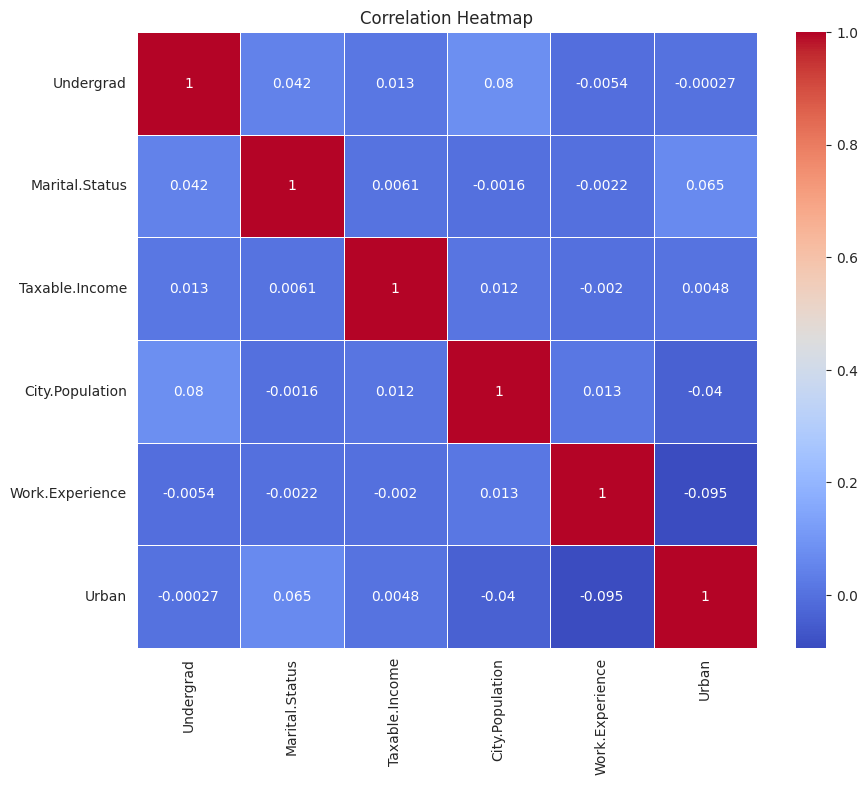

In [17]:
# Heatmap
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

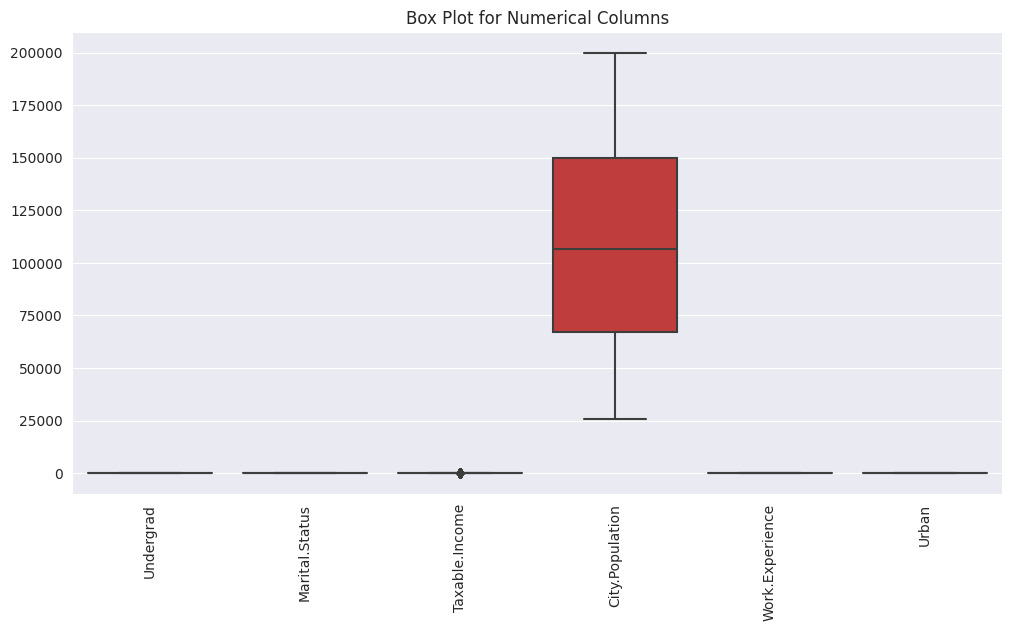

In [18]:
# Check for outliers in numerical columns using box plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.title('Box Plot for Numerical Columns')
plt.xticks(rotation=90)
plt.show()

In [19]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score for Training Data:",ac1.round(3))
print("Accuracy Score for Test Data:",ac2.round(3))

Accuracy Score for Training Data: 1.0
Accuracy Score for Test Data: 0.633


In [20]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100,
                           max_samples=0.6,
                           max_features=0.7)
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.6)

In [21]:
# Decision Trees
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

In [22]:
from sklearn.ensemble import BaggingRegressor
Bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=(10)),
                        n_estimators=100,
                        max_samples= 0.6,
                        max_features = 0.7,
                        random_state=123)


Bag.fit(X_train,Y_train)
Y_pred_train = Bag.predict(X_train)
Y_pred_test = Bag.predict(X_test)

from sklearn.metrics import mean_squared_error
error1= mean_squared_error(Y_train,Y_pred_train)
print("Bag- Training Error:", np.sqrt(error1).round(3))
error2= mean_squared_error(Y_test,Y_pred_test)
print("Bag- Test Error:", np.sqrt(error2).round(3))
print("Bag- Variance between Train and Test",(np.sqrt(error2)-np.sqrt(error1)).round(3))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bag- Training Error: 0.294
Bag- Test Error: 0.445
Bag- Variance between Train and Test 0.151


In [23]:
Y_pred_train=RFC.predict(X_train)
Y_pred_test=RFC.predict(X_test)

[Text(0.3540890194954128, 0.9772727272727273, 'x[1] <= 0.5\ngini = 0.317\nsamples = 450\nvalue = [361, 89]'),
 Text(0.22075688073394495, 0.9318181818181818, 'x[2] <= 198872.5\ngini = 0.241\nsamples = 143\nvalue = [123, 20]'),
 Text(0.21158256880733944, 0.8863636363636364, 'x[3] <= 23.5\ngini = 0.232\nsamples = 142\nvalue = [123, 19]'),
 Text(0.16628440366972477, 0.8409090909090909, 'x[3] <= 14.5\ngini = 0.268\nsamples = 113\nvalue = [95, 18]'),
 Text(0.10321100917431193, 0.7954545454545454, 'x[2] <= 160702.0\ngini = 0.216\nsamples = 73\nvalue = [64, 9]'),
 Text(0.05045871559633028, 0.75, 'x[3] <= 6.5\ngini = 0.172\nsamples = 63\nvalue = [57, 6]'),
 Text(0.01834862385321101, 0.7045454545454546, 'x[2] <= 87875.5\ngini = 0.071\nsamples = 27\nvalue = [26, 1]'),
 Text(0.009174311926605505, 0.6590909090909091, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.027522935779816515, 0.6590909090909091, 'x[2] <= 101678.0\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.0183486238532110

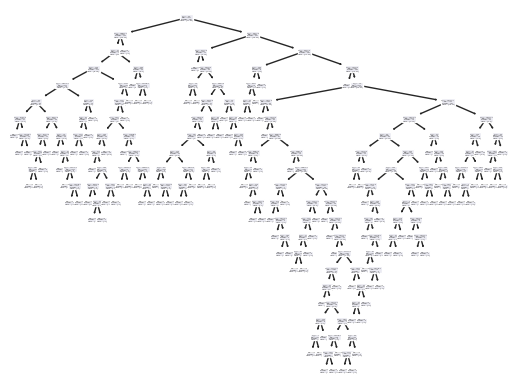

In [24]:
from sklearn import tree
tree.plot_tree(DTC)

In [ ]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score for Training Data:",ac1.round(3))
print("Accuracy Score fro Test Data:",ac2.round(3))

Accuracy Score for Training Data: 0.949
Accuracy Score fro Test Data: 0.8


[Text(0.6675838977832512, 0.9772727272727273, 'x[2] <= 139144.5\ngini = 0.341\nsamples = 450\nvalue = [352, 98]'),
 Text(0.5420643472906403, 0.9318181818181818, 'x[2] <= 137649.0\ngini = 0.369\nsamples = 311\nvalue = [235, 76]'),
 Text(0.5322121305418719, 0.8863636363636364, 'x[2] <= 127377.0\ngini = 0.362\nsamples = 308\nvalue = [235, 73]'),
 Text(0.4486607142857143, 0.8409090909090909, 'x[2] <= 116332.0\ngini = 0.348\nsamples = 285\nvalue = [221, 64]'),
 Text(0.3702278325123153, 0.7954545454545454, 'x[2] <= 115757.5\ngini = 0.366\nsamples = 257\nvalue = [195, 62]'),
 Text(0.3603756157635468, 0.75, 'x[2] <= 100521.5\ngini = 0.36\nsamples = 255\nvalue = [195, 60]'),
 Text(0.2453817733990148, 0.7045454545454546, 'x[2] <= 96172.5\ngini = 0.334\nsamples = 212\nvalue = [167, 45]'),
 Text(0.2355295566502463, 0.6590909090909091, 'x[2] <= 95903.0\ngini = 0.349\nsamples = 200\nvalue = [155, 45]'),
 Text(0.22567733990147784, 0.6136363636363636, 'x[0] <= 0.5\ngini = 0.344\nsamples = 199\nvalue =

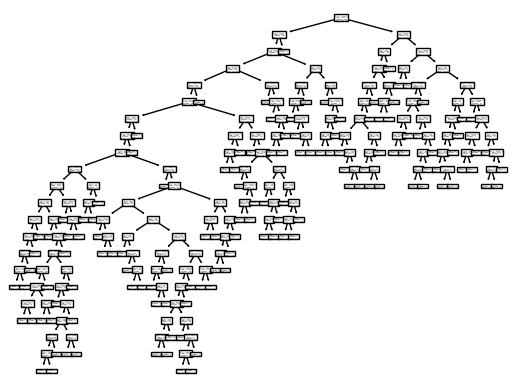

In [ ]:
from sklearn import tree
tree.plot_tree(DTC)

In [25]:
from sklearn.ensemble import BaggingRegressor
Bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=(10)),
                        n_estimators=100,
                        max_samples= 0.6,
                        max_features = 0.7,
                        random_state=123)


Bag.fit(X_train,Y_train)
Y_pred_train = Bag.predict(X_train)
Y_pred_test = Bag.predict(X_test)

from sklearn.metrics import mean_squared_error
error1= mean_squared_error(Y_train,Y_pred_train)
print("Bag- Training Error:", np.sqrt(error1).round(3))
error2= mean_squared_error(Y_test,Y_pred_test)
print("Bag- Test Error:", np.sqrt(error2).round(3))
print("Bag- Variance between Train and Test",(np.sqrt(error2)-np.sqrt(error1)).round(3))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bag- Training Error: 0.294
Bag- Test Error: 0.445
Bag- Variance between Train and Test 0.151


In [26]:
# Random Forests
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=(8),
                        n_estimators=100,
                        max_samples= 0.6,
                        max_features = 0.7,
                        random_state=123)
RF.fit(X_train,Y_train)
Y_pred_train = RF.predict(X_train)
Y_pred_test = RF.predict(X_test)

from sklearn.metrics import mean_squared_error
error1= mean_squared_error(Y_train,Y_pred_train)
print("RF- Training Error:", np.sqrt(error1).round(3))
error2= mean_squared_error(Y_test,Y_pred_test)
print("RF- Test Error:", np.sqrt(error2).round(3))
print("RF- Variance between Train and Test",(np.sqrt(error2)-np.sqrt(error1)).round(3))

RF- Training Error: 0.293
RF- Test Error: 0.442
RF- Variance between Train and Test 0.149


In [27]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=350,
                                max_depth=5,
                                learning_rate=0.01)

GBR.fit(X_train,Y_train)
Y_pred_train = GBR.predict(X_train)
Y_pred_test = GBR.predict(X_test)

from sklearn.metrics import mean_squared_error
error1= mean_squared_error(Y_train,Y_pred_train)
print("GBR- Training Error:", np.sqrt(error1).round(3))
error2= mean_squared_error(Y_test,Y_pred_test)
print("GBR- Test Error:", np.sqrt(error2).round(3))
print("GBR- Variance between Train and Test",(np.sqrt(error2)-np.sqrt(error1)).round(3))

GBR- Training Error: 0.291
GBR- Test Error: 0.456
GBR- Variance between Train and Test 0.165


In [28]:
# Grid search CV
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(100,700,100),'learning_rate': np.arange(0.001,0.1,0.01)}

gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(),
                        param_grid = param_test1,
                        scoring='neg_mean_squared_error', cv=5)

gsearch1.fit(X,Y)

import numpy as np
np.sqrt(abs(gsearch1.best_score_))

gsearch1.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [29]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
ABR = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                        n_estimators=250,
                        learning_rate=2)

ABR.fit(X_train,Y_train)
Y_pred_train = ABR.predict(X_train)
Y_pred_test = ABR.predict(X_test)

from sklearn.metrics import mean_squared_error
error1= mean_squared_error(Y_train,Y_pred_train)
print("ABR- Training Error:", np.sqrt(error1).round(3))
error2= mean_squared_error(Y_test,Y_pred_test)
print("ABR- Test Error:", np.sqrt(error2).round(3))
print("ABR- Variance between Train and Test",(np.sqrt(error2)-np.sqrt(error1)).round(3))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ABR- Training Error: 0.163
ABR- Test Error: 0.572
ABR- Variance between Train and Test 0.408


In [31]:
pip install scikit-learn

In [32]:
pip install xgboost

AttributeError: ignored

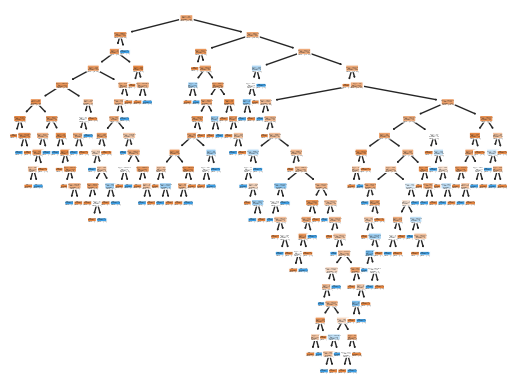

In [33]:
from sklearn import tree
import graphviz
data=tree.plot_tree(DTC,filled=True,rounded=True)
Graph=graphviz.Source(data)
Graph